In [52]:
#libraies for collection of data
import numpy as np
import pandas as pd
# for plotting
from matplotlib import pyplot as plt
#libraries for feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#model selection and training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [53]:
# loading the data and preparing the DataFrame 
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df= pd.read_csv('housing (task4).csv',skipinitialspace=True,delim_whitespace=True,names=names)
df.dropna(inplace=True)
#df

In [54]:
# Converting DF to Arrays
arr= df.values
#print(arr)
x= arr[:,0:13]
y= arr[:,13]
#print(x)
#print(y)

In [55]:
# feature scaling
rex= MinMaxScaler(feature_range=(0,1)).fit_transform(x)
#print(rex)

In [56]:
# slicing the dataset using sklearn lib function
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_validation= train_test_split(rex,y,test_size=validation_size,random_state=seed)
#print(X_train)
#print(X_validation)

In [57]:
# feeding to various ML model and testing r2 score
num_folds= 3
seed=1
scoring_method= 'r2'
models=[('LR',LinearRegression()),('LASSO',Lasso()),('EN',ElasticNet()),('KNN',KNeighborsRegressor()),('CART',DecisionTreeRegressor()),('SVR',SVR())]
# evaluating r2 score of each model
results=[]
names=[]
for name,model in models:
  kfold= KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results= cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring_method)
  results.append(cv_results)
  names.append(name)
  print("%s  %f  %f"%(name,cv_results.mean(),cv_results.std()))
# now we get the r2 score of different model, LR score is the most close to 1

LR  0.737467  0.011413
LASSO  0.245332  0.057829
EN  0.160228  0.023761
KNN  0.655409  0.021859
CART  0.742287  0.047519
SVR  0.527794  0.038373


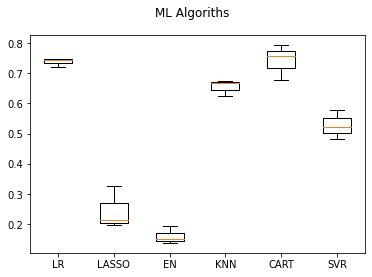

In [58]:
# comparing on the measures of central tendency using boxplot
fig= plt.figure()
fig.suptitle('ML Algoriths')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [59]:
# now we will compare both the r2 score of the models and the boxplot results to decide the final result.
# best r2 scores are of LR, CART and KNN, now we'll compare the boxplot of these three
# clearly, CART has the best distribution
# there we choose our final model- CART

In [62]:
# preparing the model using train sets and testing on the validation set to get the fnal score
cart= DecisionTreeRegressor(max_depth=10)
cart.fit(X_train,Y_train)
predictions = cart.predict(X_validation)
print(r2_score(Y_validation,predictions)) #final result

0.6526367619655704


In [50]:
#model= SVR()
#model.fit(X_train,Y_train)
#pr= model.predict(X_validation)
#print(r2_score(Y_validation,predictions))